<a href="https://colab.research.google.com/github/Bindhubhavanan/CodeTech_IT_Solutions_Artificial_Intelligence/blob/main/Task_2_Model_Evaluation_And_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
y = (y == 0).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [ ]:
param_grid_rf = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 5, 10]
}
grid_rf = GridSearchCV(models["Random Forest"], param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
models["Random Forest"] = grid_rf.best_estimator_

In [ ]:
models["Logistic Regression"].fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }
    results.append(metrics)


In [ ]:
results_df = pd.DataFrame(results)
print("Model Evaluation Results:\n", results_df)

Model Evaluation Results:
                  Model  Accuracy  Precision  Recall  F1 Score  AUC-ROC
0  Logistic Regression       1.0        1.0     1.0       1.0      1.0
1        Random Forest       1.0        1.0     1.0       1.0      1.0


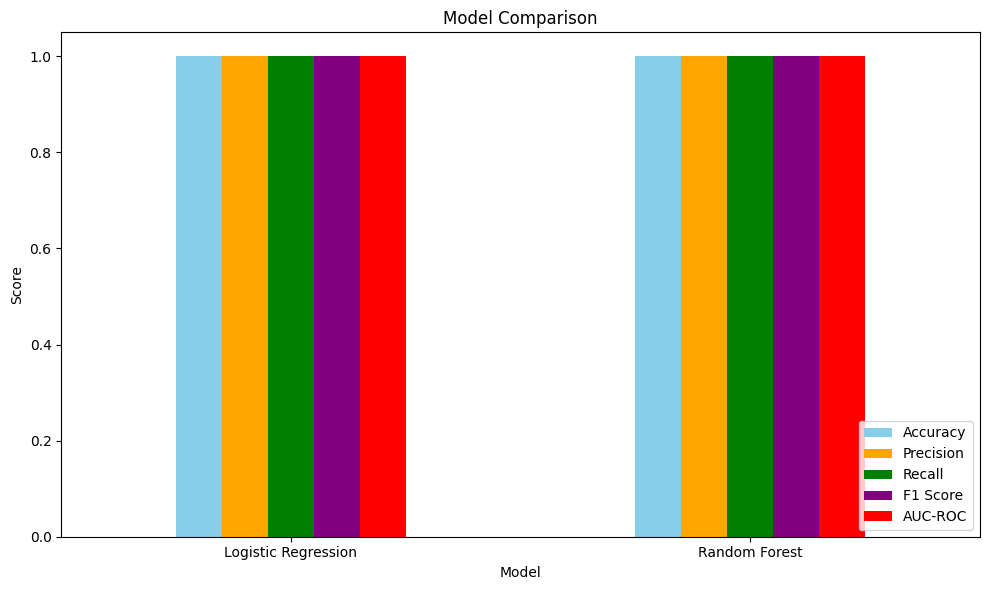

In [ ]:
results_df.set_index("Model").plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green', 'purple', 'red'])
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

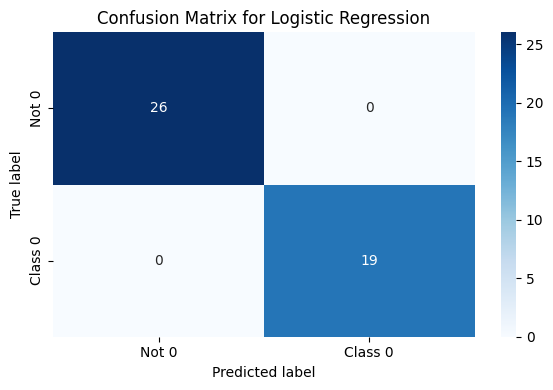

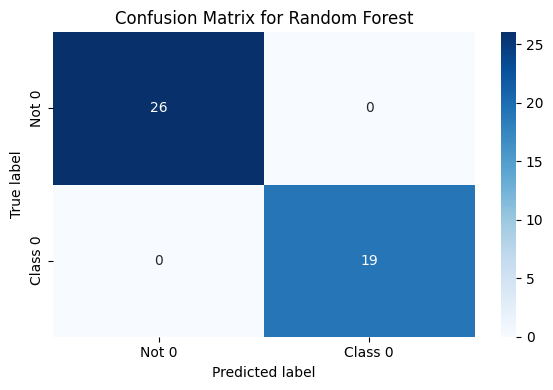

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not 0', 'Class 0'], yticklabels=['Not 0', 'Class 0'])
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()